In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       

In [24]:
# Load the dataset
df = pd.read_csv('/Users/georgepaul/Desktop/Research-Project/Data/Usable_data_Offices_Clean.csv')

print(df.columns.tolist())

['PUBID', 'REGION', 'CENDIV', 'PBA', 'PUBCLIM', 'SQFT', 'SQFTC', 'WLCNS', 'RFCNS', 'RFCOOL', 'RFTILT', 'BLDSHP', 'GLSSPC', 'NFLOOR', 'BASEMNT', 'FLCEILHT', 'ATTIC', 'ELEVTR', 'NELVTR', 'ESCLTR', 'NESLTR', 'YRCONC', 'RENOV', 'RENCOS', 'RENADD', 'RENRDC', 'RENINT', 'RENRFF', 'RENWIN', 'RENHVC', 'RENLGT', 'RENPLB', 'RENELC', 'RENINS', 'RENSAF', 'RENSTR', 'RENOTH', 'DRYCL', 'VACANT', 'PBAPLUS', 'RWSEAT', 'PBSEAT', 'EDSEAT', 'FDSEAT', 'DRVTHRU', 'HCBED', 'NRSBED', 'LODGRM', 'COURT', 'FACIL', 'FEDFAC', 'FACACT', 'MANIND', 'PLANT', 'FACDST', 'FACDHW', 'FACDCW', 'FACELC', 'BLDPLT', 'GOVOWN', 'GOVTYP', 'OWNTYPE', 'NOCC', 'NOCCAT', 'OWNOCC', 'OWNOPR', 'OWNPPR', 'NWNPPR', 'NWNOPR', 'WHOPPR', 'MONUSE', 'OCCUPYP', 'LODOCCP', 'OPEN24', 'OPNMF', 'OPNWE', 'WKHRS', 'WKHRSC', 'NWKER', 'NWKERC', 'HT1', 'HT2', 'COOL', 'WATR', 'COOK', 'MANU', 'EGYUSED', 'ELUSED', 'NGUSED', 'FKUSED', 'PRUSED', 'STUSED', 'HWUSED', 'CWUSED', 'WOUSED', 'COUSED', 'SOUSED', 'OTUSED', 'FKTYPE', 'SOPANEL', 'SOTHERM', 'HEATP', 'HTL

# Variables of interest

Square footage: **SQFT** - What is the gross or total square footage of all the space in this building, both finished and unfinished, including basements, hallways, lobbies, stairways, elevator shafts, and indoor parking levels?

Number of floors: **NFLOOR** - How many floors are in the tallest section of the building? Include basements, parking levels, or any other floors below ground level. Exclude attics, half-floors, mezzanines, balconies, and lofts. If you’re not sure, please provide your best estimate.

Floor to ceiling height: **FLCEILHT** - What is the typical floor-to-ceiling height in this building, measured in feet?

Num	Year of construction category: **YRCONC** - "2=Before 1946, 3=1946 to 1959, 4=1960 to 1969, 5=1970 to 1979, 6=1980 to 1989, 7=1990 to 1999, 8=2000 to 2012, 9=2013 to 2018"

Months in use: **MONUSE** - How many months was this building in use during calendar year 2018?

Percent occupancy: **OCCUPYP** - In 2018, about what percentage of the total floorspace of this building was occupied? If occupancy varied, please provide the average.

Total hours open per week: **WKHRS**

Number of employees: **NWKER** - How many employees work in the building during the main shift, that is, when most employees are present? Please note that this is not a total count of workers, but rather a count of workers who are present at the same time. Include any volunteer workers. Do not include employees who always work outside the building, such as drivers with delivery routes.

Derived variable, main heating equipment: **MAINHT** (1-40)

Percent heated: **HEATP** - What percentage of the square footage in this building was heated to at least 50 degrees Fahrenheit during 2018, including basements and indoor parking levels if they were heated to at least 50 degrees? If you’re not sure, please provide your best estimate.

Percent cooled: **COOLP** - What percentage of the square footage in this building was cooled by air conditioning equipment during 2018? If you’re not sure, please provide your best estimate.

Derived variable, main airconditioning equipment: **MAINCL** (1-17)

Data Center: **DATACNTR** - Which of these types of computer areas are found in this building? Data center?

Percent lit no hours: **LTZHRP** - What percentage of the square footage is usually lit?

Percent daylight: **DAYLTP** - What percentage of the building receives enough outside light so that the interior lights do not need to be turned on? If you’re not sure, please provide your best estimate.

Third-party data, Heating degree days (base 65): **HDD65** 

Third-party data, Cooling degree days (base 65): **CDD65**

Derived variable, Annual major fuels consumption (thous Btu): **MFBTU**

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Columns: 1004 entries, PUBID to EUI_kWh_per_sqmt
dtypes: float64(641), int64(363)
memory usage: 10.2 MB
None

Summary Statistics:
             PUBID       REGION       CENDIV     PBA      PUBCLIM  \
count  1329.000000  1329.000000  1329.000000  1329.0  1329.000000   
mean   3254.404816     2.659142     5.176825     2.0     3.313017   
std    1873.431391     1.026967     2.454625     0.0     1.298106   
min       1.000000     1.000000     1.000000     2.0     1.000000   
25%    1662.000000     2.000000     3.000000     2.0     2.000000   
50%    3336.000000     3.000000     5.000000     2.0     3.000000   
75%    4861.000000     3.000000     7.000000     2.0     4.000000   
max    6434.000000     4.000000     9.000000     2.0     7.000000   

               SQFT        SQFTC        WLCNS        RFCNS       RFCOOL  ...  \
count  1.329000e+03  1329.000000  1329.000000  1329.000000  1329.000000  ...   
me

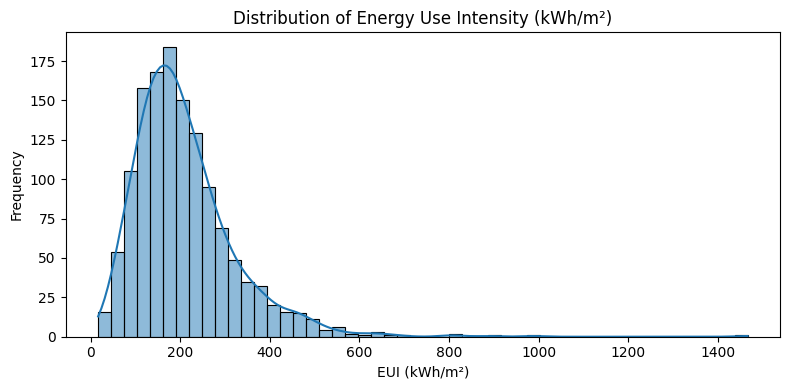

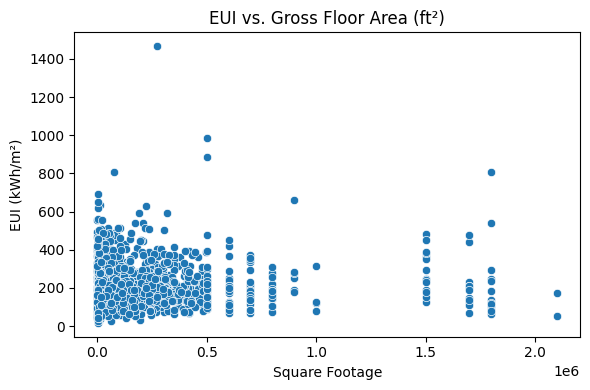

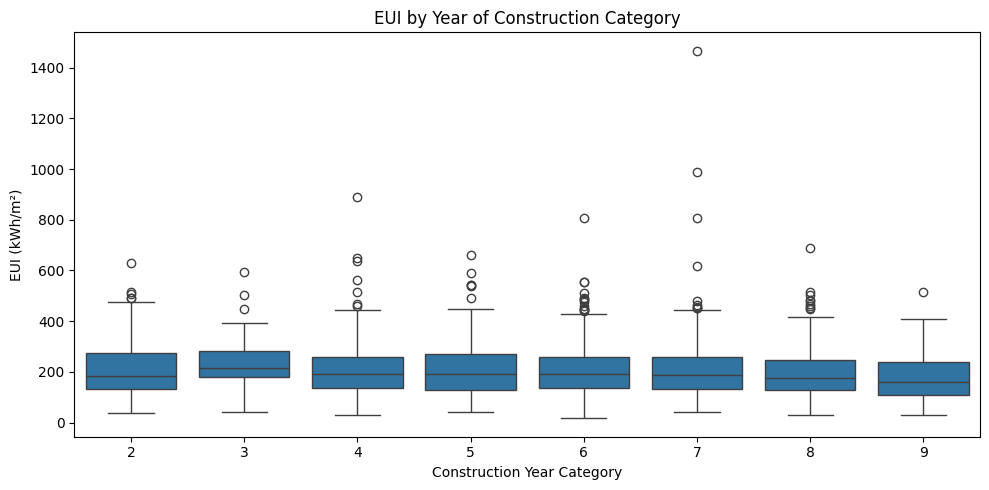

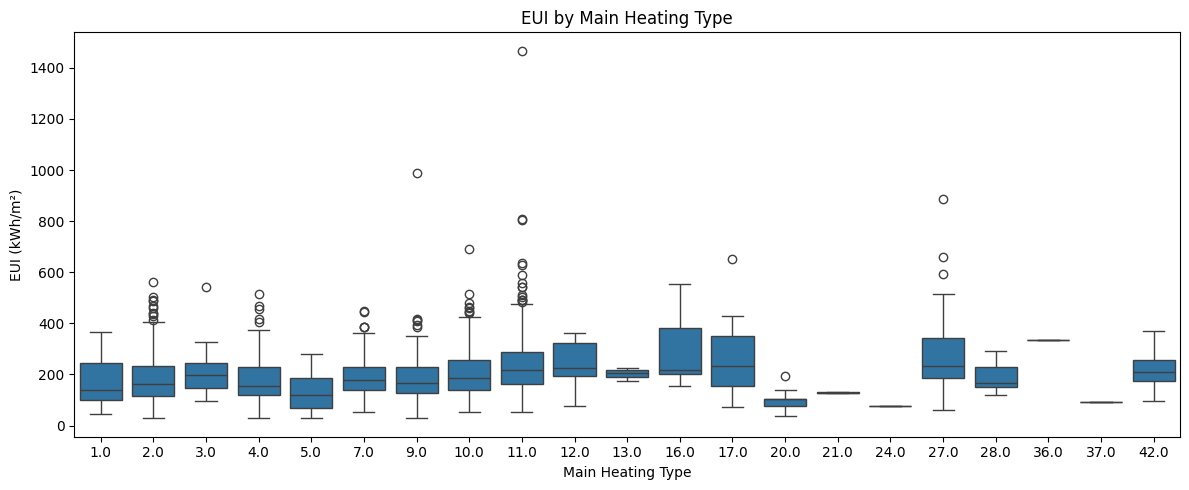

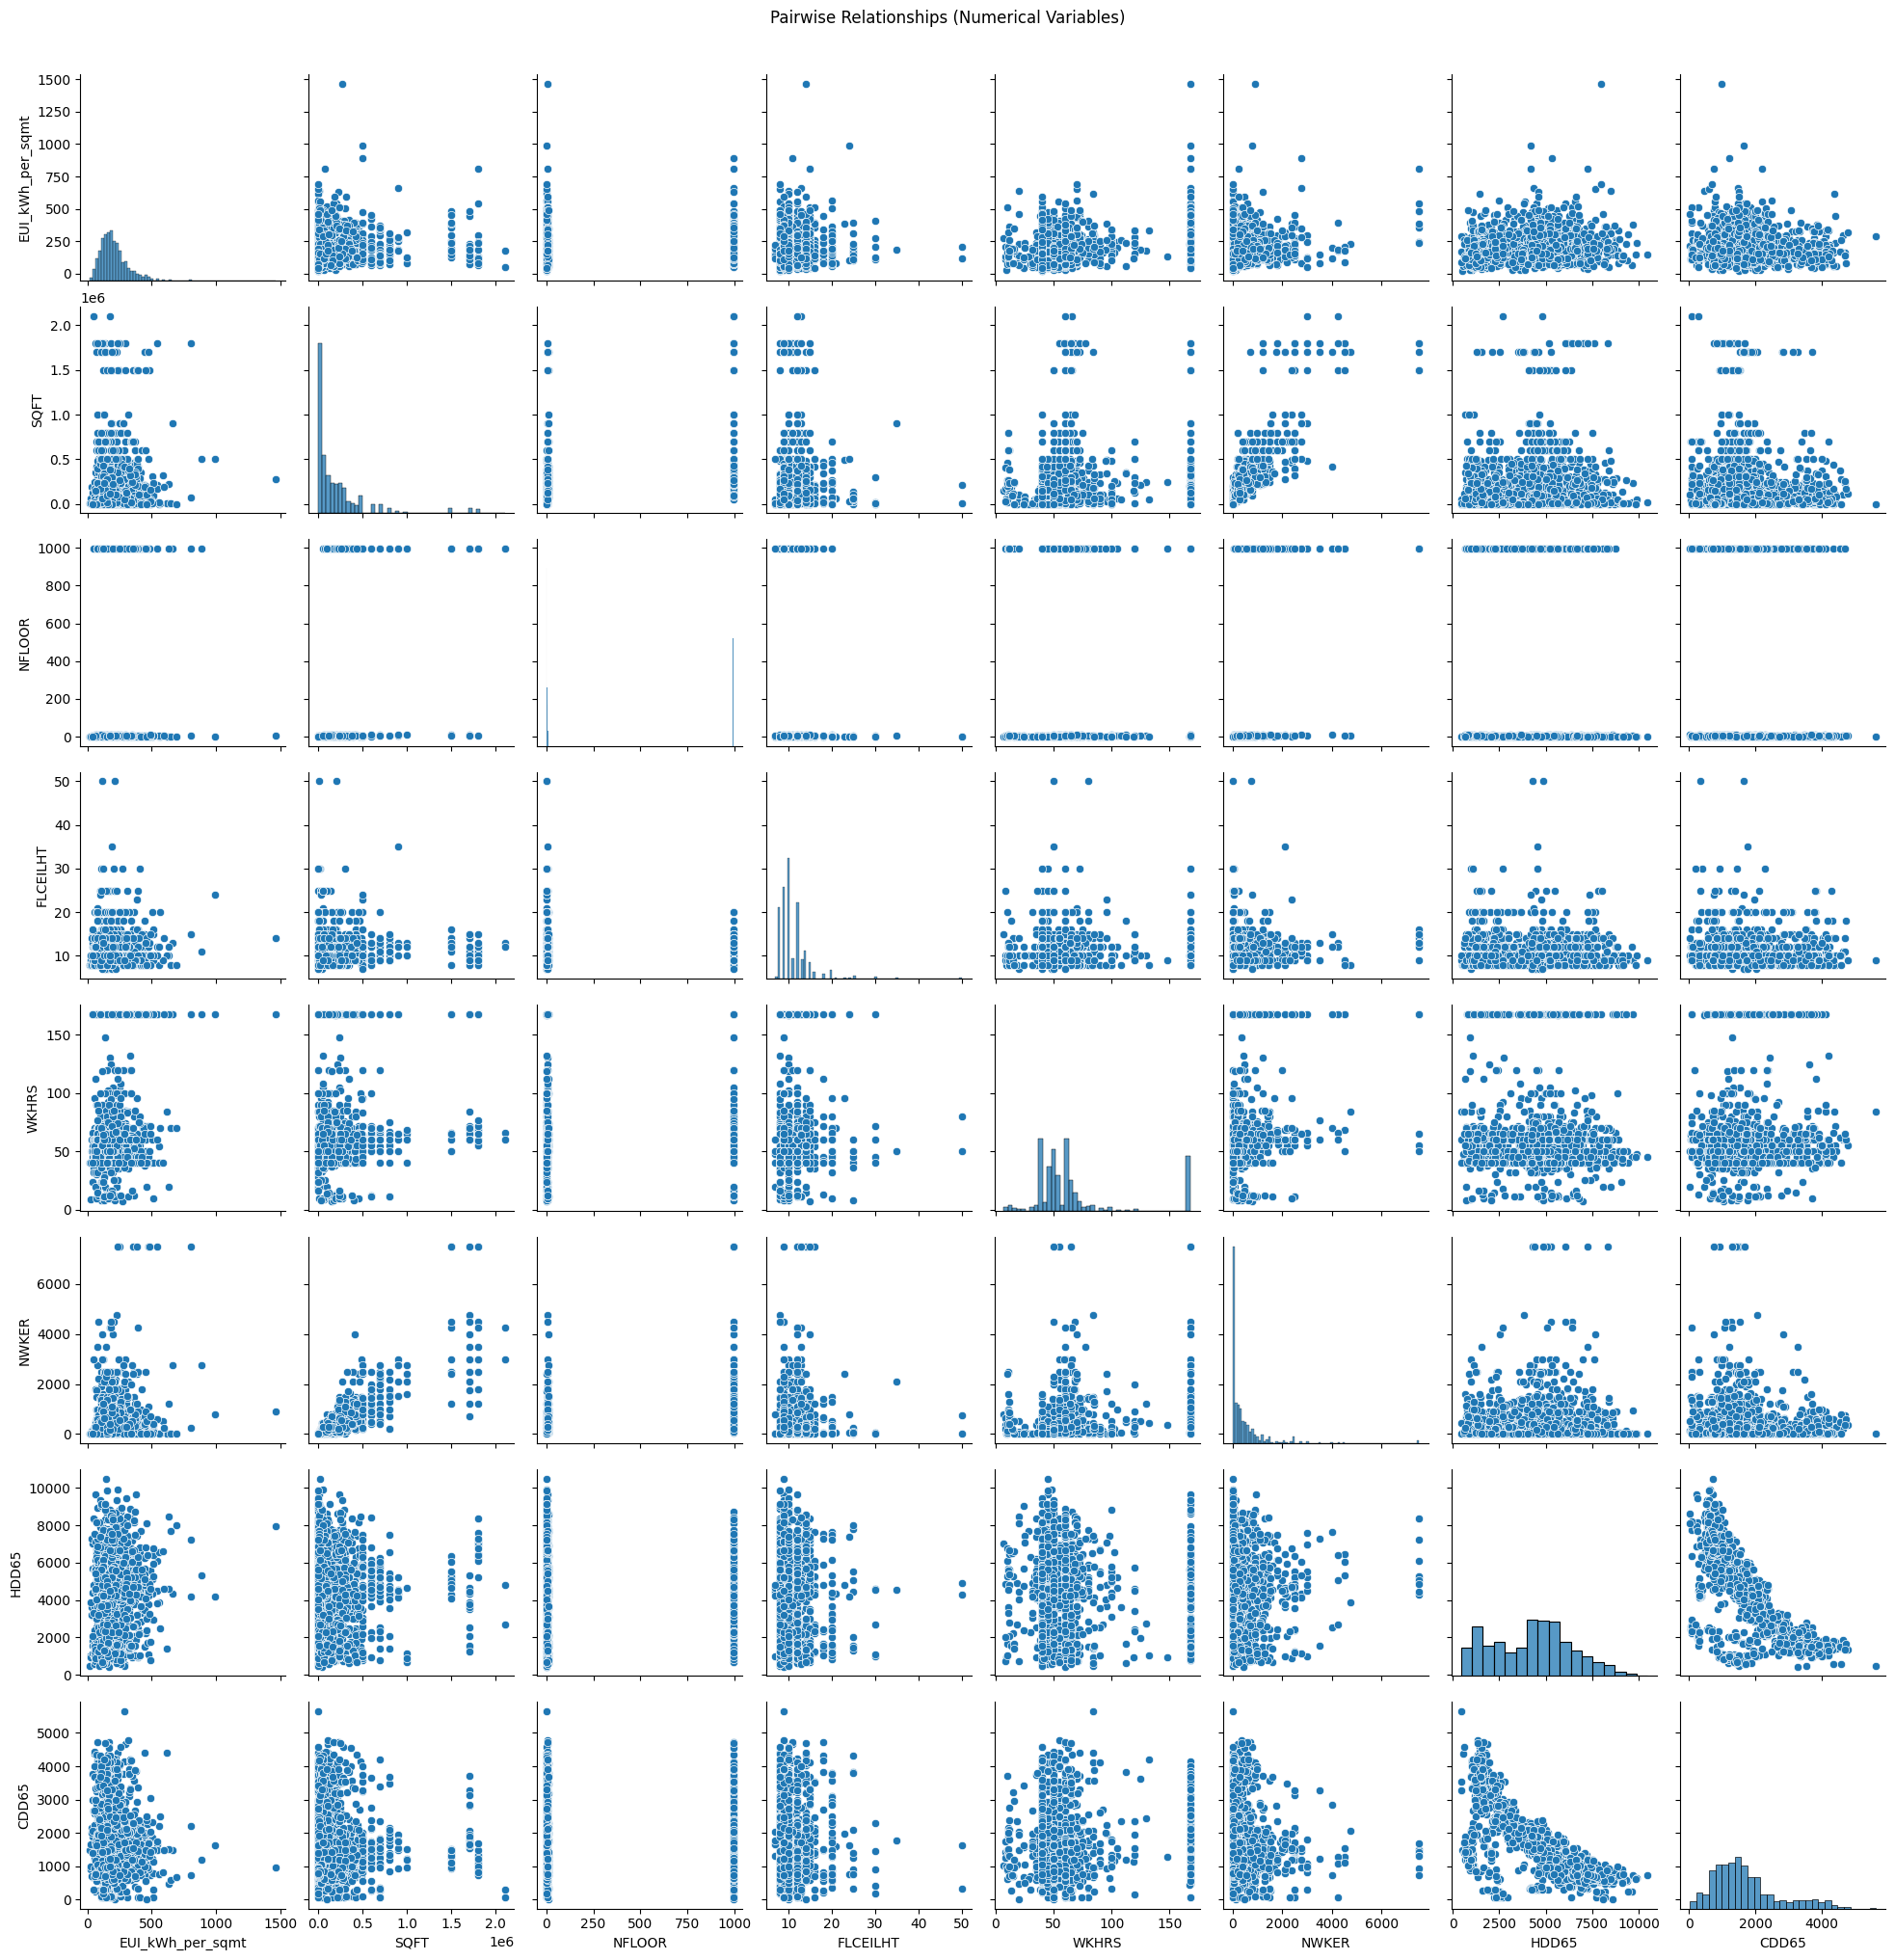

In [25]:
# Basic info
print("Basic Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Missing values
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Correlation with EUI (numerical only)
eui_corr = df.corr(numeric_only=True)['EUI_kWh_per_sqmt'].sort_values(ascending=False)
print("\nTop correlations with EUI (kWh/m²):")
print(eui_corr.head(10))
print("\nBottom correlations with EUI (kWh/m²):")
print(eui_corr.tail(10))

# --- Key visualizations ---

# Histogram of EUI
plt.figure(figsize=(8, 4))
sns.histplot(df['EUI_kWh_per_sqmt'], bins=50, kde=True)
plt.title('Distribution of Energy Use Intensity (kWh/m²)')
plt.xlabel('EUI (kWh/m²)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter: EUI vs. SQFT
plt.figure(figsize=(6, 4))
sns.scatterplot(x='SQFT', y='EUI_kWh_per_sqmt', data=df)
plt.title('EUI vs. Gross Floor Area (ft²)')
plt.xlabel('Square Footage')
plt.ylabel('EUI (kWh/m²)')
plt.tight_layout()
plt.show()

# Boxplot: EUI by year of construction
plt.figure(figsize=(10, 5))
sns.boxplot(x='YRCONC', y='EUI_kWh_per_sqmt', data=df)
plt.title('EUI by Year of Construction Category')
plt.xlabel('Construction Year Category')
plt.ylabel('EUI (kWh/m²)')
plt.tight_layout()
plt.show()

# Boxplot: EUI by main heating type
plt.figure(figsize=(12, 5))
sns.boxplot(x='MAINHT', y='EUI_kWh_per_sqmt', data=df)
plt.title('EUI by Main Heating Type')
plt.xlabel('Main Heating Type')
plt.ylabel('EUI (kWh/m²)')
plt.tight_layout()
plt.show()

# Pairplot of key continuous variables
key_vars = ['EUI_kWh_per_sqmt', 'SQFT', 'NFLOOR', 'FLCEILHT', 'WKHRS', 'NWKER', 'HDD65', 'CDD65']
sns.pairplot(df[key_vars].dropna())
plt.suptitle("Pairwise Relationships (Numerical Variables)", y=1.02)
plt.show()

In [26]:
# Step 1: Drop columns that are entirely missing
df_cleaned = df.dropna(axis=1, how='all')

# Step 2: Select relevant features
selected_columns = [
    'EUI_kWh_per_sqmt',     # Target variable
    'SQMT',                 # Gross floor area (m²)
    'NFLOOR',               # Number of floors
    'FLCEILHT',             # Floor to ceiling height
    # 'YRCONC',               # Year of construction category (categorical)
    'MONUSE',               # Months in use
    'OCCUPYP',              # Percent occupancy
    'WKHRS',                # Hours open per week
    'NWKER',                # Number of employees
    # 'MAINHT',               # Main heating equipment (categorical)
    'HEATP',                # Percent heated
    'COOLP',                # Percent cooled
    # 'MAINCL',               # Main cooling equipment (categorical)
    # 'DATACNTR',             # Data center present
    'DAYLTP',               # Percent daylight
    'HDD65',                # Heating degree days
    'CDD65'                 # Cooling degree days
]

# Step 3: Keep only selected columns
df_model = df_cleaned[selected_columns].copy()

# Step 4: Check and report missing values
missing_summary = df_model.isnull().sum()
print("Missing values per column:\n", missing_summary)

# Step 5: Drop rows with missing target or any missing features
df_model = df_model.dropna()

# Step 6: Confirm shape and preview cleaned data
print("\nCleaned dataset shape:", df_model.shape)
print(df_model.head())

Missing values per column:
 EUI_kWh_per_sqmt     0
SQMT                 0
NFLOOR               0
FLCEILHT             0
MONUSE               0
OCCUPYP              0
WKHRS                0
NWKER                0
HEATP               37
COOLP               14
DAYLTP               2
HDD65                0
CDD65                0
dtype: int64

Cleaned dataset shape: (1277, 13)
   EUI_kWh_per_sqmt         SQMT  NFLOOR  FLCEILHT  MONUSE  OCCUPYP  WKHRS  \
0        446.557221   19509.6300     994        12      12    100.0     70   
1        194.982475    2601.2840       5         8      12    100.0     45   
2        226.306350    2833.5415       3        10      12     43.0     50   
3        281.839592   17094.1520       3        12      12     92.0     38   
4        359.900019  139354.5000     995        12      12    100.0    168   

   NWKER  HEATP  COOLP  DAYLTP  HDD65  CDD65  
0    350  100.0  100.0     0.0   4463   1759  
1     12   80.0  100.0    15.0   2424    189  
2     25  100.0

### Exploratory Data Analysis (EDA) Summary

#### Dataset Overview
- The filtered dataset contains 1,329 office buildings and over 1,000 features from the 2018 CBECS Public Use Microdata.
- After selecting relevant variables and cleaning the data, the working dataset contains 1,277 buildings.

#### Target Variable
- The target variable is Energy Use Intensity (EUI), measured in kilowatt-hours per square meter per year (`EUI_kWh_per_sqmt`).

#### Feature Selection and Cleaning
- Columns with 100% missing values were dropped.
- A subset of features was selected based on domain knowledge and project goals:
  - Building structure: `SQFT`, `SQMT`, `NFLOOR`, `FLCEILHT`
  - Operations and usage: `MONUSE`, `WKHRS`, `NWKER`, `OCCUPYP`
  - Building systems and characteristics: `HEATP`, `COOLP`, `DAYLTP`, `MAINHT`, `MAINCL`, `DATACNTR`
  - Climate data: `HDD65`, `CDD65`

#### Missing Data
- Only three variables had missing values:
  - `HEATP` (37 missing values)
  - `COOLP` (14 missing values)
  - `DAYLTP` (2 missing values)
- Missing values were imputed using the median of each respective column.

#### Cleaned Dataset Summary
- Final dataset shape: 1,277 rows and 18 columns
- The dataset is now ready for encoding of categorical variables and initial baseline modeling

In [27]:
selected_columns = [
    'EUI_kWh_per_sqmt',  # Target
    'SQMT',
    'NFLOOR',
    'FLCEILHT',
    'MONUSE',
    'OCCUPYP',
    'WKHRS',
    'NWKER',
    'HEATP',
    'COOLP',
    'DAYLTP',
    'HDD65',
    'CDD65'
]

# Filter full dataset down to just those columns
df_filtered = df[selected_columns].copy()

# Check shape and preview
print("Filtered dataset shape:", df_filtered.shape)
print(df_filtered.head())

df_filtered.to_csv('/Users/georgepaul/Desktop/Research-Project/Data/Data_Ready_Model.csv', index=False)


Filtered dataset shape: (1329, 13)
   EUI_kWh_per_sqmt         SQMT  NFLOOR  FLCEILHT  MONUSE  OCCUPYP  WKHRS  \
0        446.557221   19509.6300     994        12      12    100.0     70   
1        194.982475    2601.2840       5         8      12    100.0     45   
2        226.306350    2833.5415       3        10      12     43.0     50   
3        281.839592   17094.1520       3        12      12     92.0     38   
4        359.900019  139354.5000     995        12      12    100.0    168   

   NWKER  HEATP  COOLP  DAYLTP  HDD65  CDD65  
0    350  100.0  100.0     0.0   4463   1759  
1     12   80.0  100.0    15.0   2424    189  
2     25  100.0  100.0     0.0   4615   1184  
3    400  100.0  100.0    15.0   3943   1680  
4   2500   98.0   98.0     0.0   5545   1262  
